In [ ]:
import numpy as np
with open("R32.txt", "r") as f:
  d, n, m, k, p = [int(x) for x in f.readline().split()]
  ks = [int(x) for x in f.readline().split()]
  data = [[float(x) for x in string.split()] for string in f.readlines()]
  data = np.array(data)

data.shape

(44324, 3)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_embedded = pca.fit_transform(data)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
clf.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
k = p

idx = np.argpartition(clf.negative_outlier_factor_, k)

outliers = idx[:k]
normals = idx[k:]
outliers

array([13597,  1699,  4164,  5365,  9807,  2376, 14109,  5742,   569,
        1340,  6762,  2639,    76,   873,  6941,  5125,  2817,   312,
        1716, 15865])

In [ ]:
normals.shape

(44304,)

In [ ]:
outlier = np.array([])
outlier = outliers
removed_outlier_data = np.delete(data, outlier, axis=0)


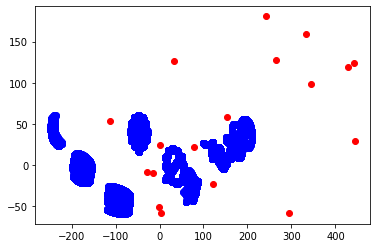

In [ ]:
plt.scatter(pca_embedded[outliers[:-1]][:,0], pca_embedded[outliers[:-1]][:,1], c = 'red')
plt.scatter(pca_embedded[normals][:,0], pca_embedded[normals][:,1], c = 'blue')
plt.show()

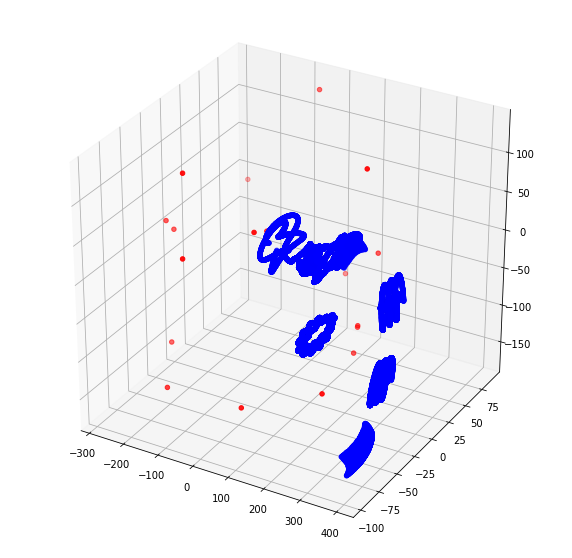

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[outliers][:,0], data[outliers][:,1], data[outliers][:,2], c = 'red')
ax.scatter(data[normals][:,0], data[normals][:,1], data[normals][:,2], c = 'blue')
# ax.scatter(labels[12][0,0], labels[12][0,1], labels[12][0,2], c = 'green')

# ax.scatter(mini_dataset[:,0], mini_dataset[:,1], mini_dataset[:,2], c = clustering.labels_)

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=m, linkage='single').fit(removed_outlier_data)

KeyboardInterrupt: ignored

#Spectral Clustering

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

clustering = MiniBatchKMeans(n_clusters=8000, random_state=0).fit(removed_outlier_data)


In [ ]:
mini_dataset = clustering.cluster_centers_

In [ ]:
from sklearn.cluster import SpectralClustering

# clustering = SpectralClustering(n_clusters=m, n_neighbors = 15, affinity = 'nearest_neighbors', 
#          assign_labels='kmeans',
#          random_state=0).fit(mini_dataset)


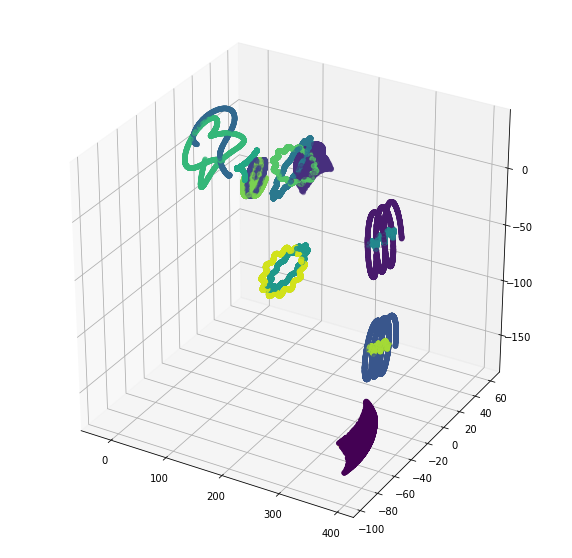

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(removed_outlier_data[:,0], removed_outlier_data[:,1], removed_outlier_data[:,2], c = clustering.labels_)

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
labels = []
for i in range(m):
  labels.append(removed_outlier_data[clustering.labels_ == i])

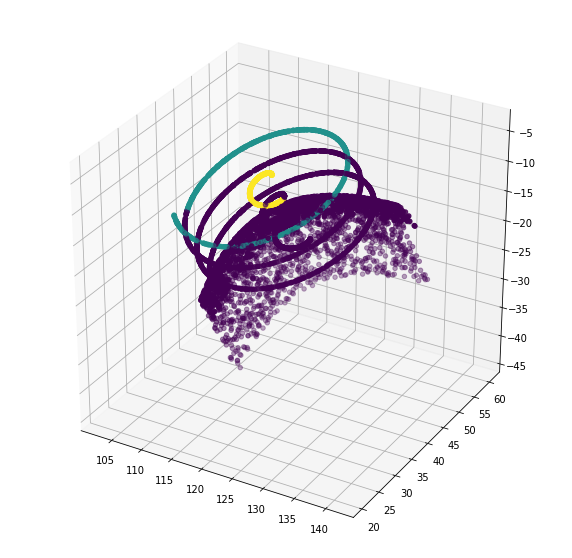

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(labels[2][:,0], labels[2][:,1], labels[2][:,2], c=clustering_t.labels_)

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_t = AgglomerativeClustering(n_clusters=3, linkage='single').fit(labels[2])

In [ ]:
clustering_t = SpectralClustering(n_clusters=3, n_neighbors = 50, affinity = 'nearest_neighbors', 
         assign_labels='kmeans',
         random_state=0).fit(labels[2])

In [ ]:
labels[15]

array([[ 386.00181532,  -95.43768633, -135.62315624],
       [ 385.9451886 ,  -95.45983235, -135.51371552]])

In [ ]:
clusters_num = [1, 1?, ???, 1, 1?, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ]

In [ ]:
!pip install scikit-dimension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 


In [ ]:
import skdim
lpca = skdim.id.MiND_ML(k=20, D=2).fit_pw(data[normals])

In [ ]:
lpca.dimension_pw_

array([1.17292168, 1.15072076, 1.25295807, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
dimensions = lpca.dimension_pw_

In [ ]:
don = normals[dimensions>=1.4]
uno = normals[dimensions<1.4]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_don = AgglomerativeClustering(n_clusters=2, linkage='single').fit(data[don])


In [ ]:
clustering_uno = AgglomerativeClustering(n_clusters=m, linkage='single').fit(data[uno])

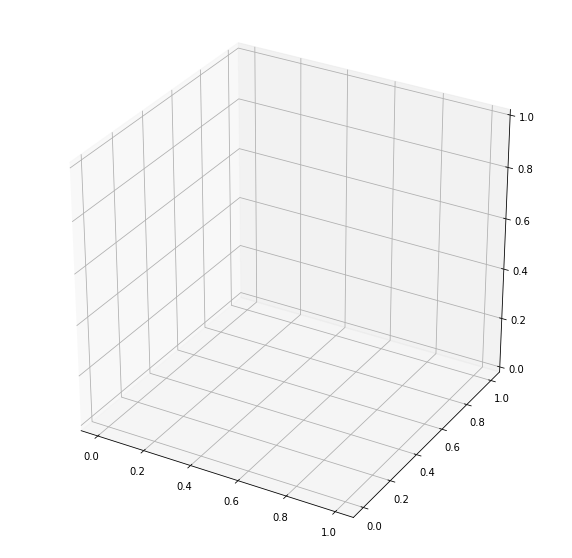

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[uno[clustering_uno.labels_ == 15],0],
           data[uno[clustering_uno.labels_ == 15],1], 
           data[uno[clustering_uno.labels_ == 15],2])

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
lpca.transform_pw(uno[clustering_uno.labels_ == 5])

array([1.1551754 , 1.13287723, 1.20118107, ..., 1.        , 0.99743228,
       1.        ])

In [ ]:
labels = []

In [ ]:
labels.append(uno[clustering_uno.labels_ == 1])
labels.append(uno[clustering_uno.labels_ == 3])
labels.append(uno[clustering_uno.labels_ == 4])
labels.append(uno[clustering_uno.labels_ == 5])
labels.append(uno[clustering_uno.labels_ == 6])
labels.append(uno[clustering_uno.labels_ == 7])
labels.append(uno[clustering_uno.labels_ == 8])

In [ ]:
labels.append(uno[clustering_uno.labels_ == 9])
labels.append(uno[clustering_uno.labels_ == 10])
labels.append(uno[clustering_uno.labels_ == 12])
labels.append(uno[clustering_uno.labels_ == 13])
labels.append(uno[clustering_uno.labels_ == 14])
labels.append(uno[clustering_uno.labels_ == 15])

In [ ]:
handled = np.array([])
for i in range(len(labels)):
  handled = np.union1d(handled, labels[i])

In [ ]:
remained = np.setdiff1d(normals, handled)

In [ ]:
remained.shape

(11049,)

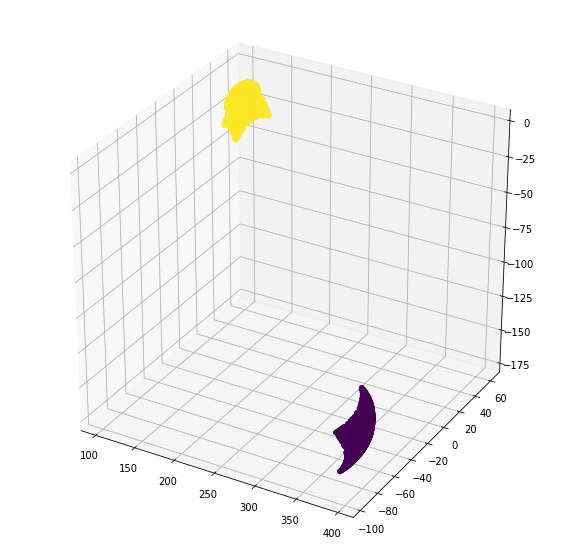

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[remained,0],
           data[remained,1], 
           data[remained,2], c = clustering_remianed.labels_)

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

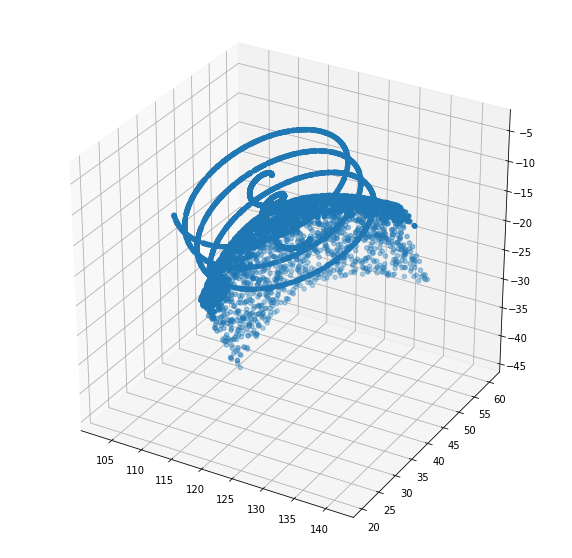

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[remained[clustering_remianed.labels_ == 1],0],
           data[remained[clustering_remianed.labels_ == 1],1], 
           data[remained[clustering_remianed.labels_ == 1],2])

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
clustering_remianed = AgglomerativeClustering(n_clusters=2, linkage='single').fit(data[remained])

In [ ]:
labels.append(remained[clustering_remianed.labels_ == 0])

In [ ]:
labels[-1].shape

(2827,)

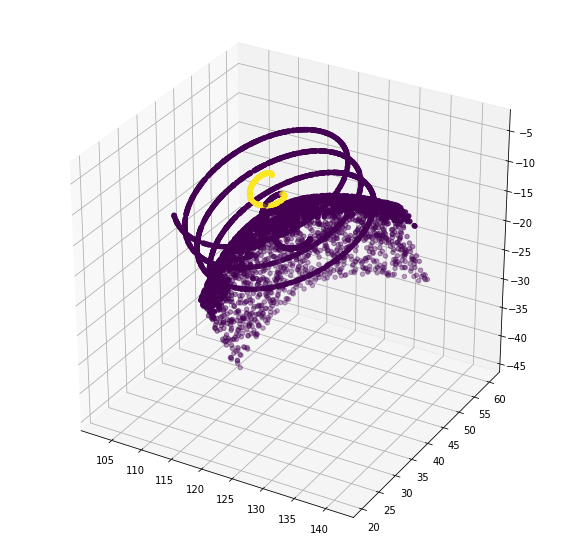

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[on_my_nerd,0],
           data[on_my_nerd,1], 
           data[on_my_nerd,2], c=clustering_on_my_nerd.labels_)

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
on_my_nerd = remained[clustering_remianed.labels_ == 1]

In [ ]:
from sklearn.cluster import SpectralClustering

clustering_on_my_nerd = SpectralClustering(n_clusters=2, n_neighbors = 20, affinity = 'nearest_neighbors', 
         assign_labels='kmeans',
         random_state=0).fit(data[on_my_nerd])


In [ ]:
import skdim
lpca = skdim.id.MiND_ML(k=5).fit_pw(data[on_my_nerd])

In [ ]:
dimensions = lpca.dimension_pw_

In [ ]:
dimensions

array([2.        , 1.32027475, 2.        , ..., 1.05898628, 1.04673831,
       1.        ])

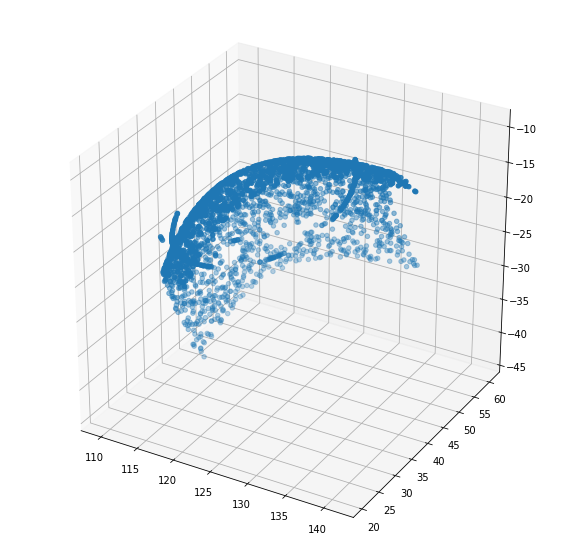

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[on_my_nerd[dimensions >= 1.3],0],
           data[on_my_nerd[dimensions >= 1.3],1], 
           data[on_my_nerd[dimensions >= 1.3],2])

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
labels.append(on_my_nerd[dimensions > 1.3])

In [ ]:
def find_dimension(data):
  farah = skdim.id.MADA().fit(data)
  return int(farah.dimension_)

In [ ]:
find_dimension(data[on_my_nerd[dimensions <= 1.3]])

1

In [ ]:
clustering_last = AgglomerativeClustering(n_clusters=2, linkage='single').fit(data[on_my_nerd[dimensions <= 1.3]])

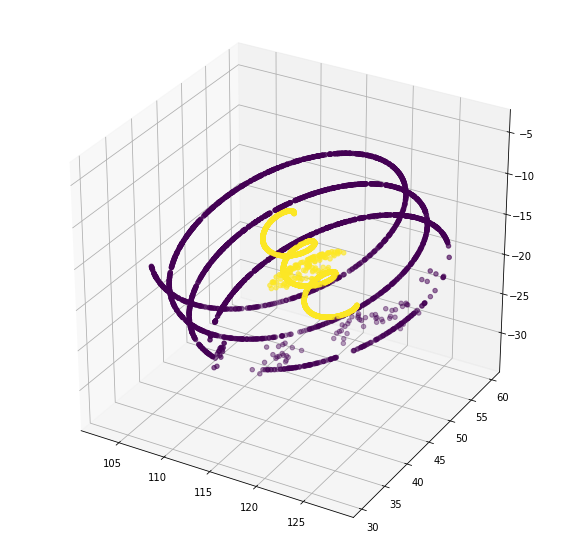

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[on_my_nerd[dimensions <= 1.3],0],
           data[on_my_nerd[dimensions <= 1.3],1], 
           data[on_my_nerd[dimensions <= 1.3],2], c=clustering_last.labels_)

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
labels.append(on_my_nerd[dimensions <= 1.3][clustering_last.labels_==0])

In [ ]:
labels.append(on_my_nerd[dimensions <= 1.3][clustering_last.labels_==1])

In [ ]:
handled_last = np.array([])
for i in range(len(labels)):
  handled_last = np.union1d(handled_last, labels[i])

In [ ]:
len(labels)

17

IndexError: ignored

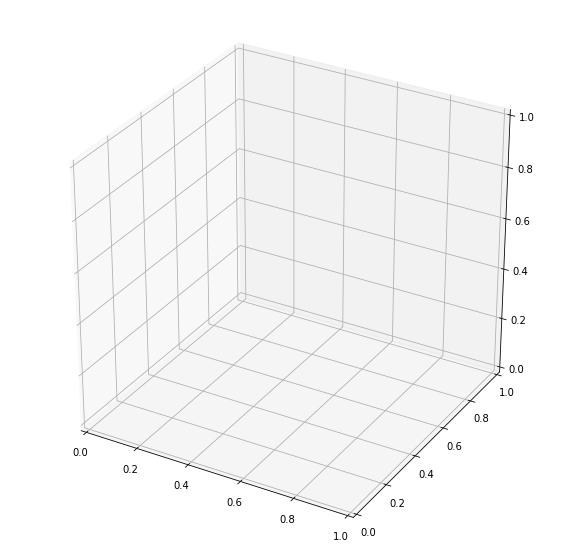

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[labels[17],0],
           data[labels[17],1], 
           data[labels[17],2])

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
manifolds = []3, 9

In [ ]:
manifolds.append(np.concatenate((labels[3], labels[9]), axis=0))

In [ ]:
manifolds.append(labels[16])

In [ ]:
len(manifolds)

15

In [ ]:
manifolds = manifolds[:-1]

In [ ]:
clusters_num = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]

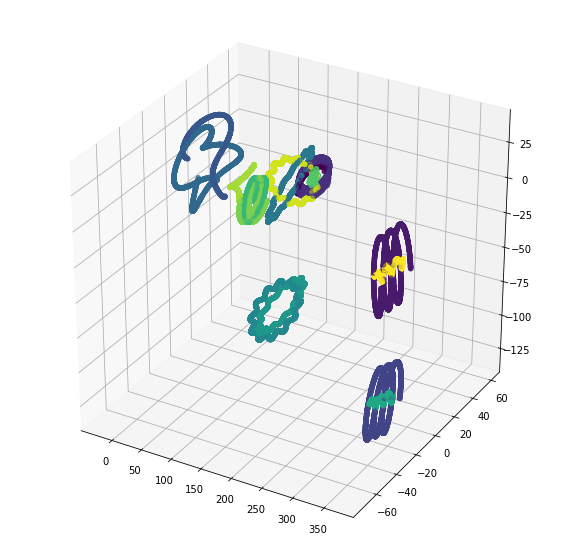

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(don[:,0], don[:,1], don[:,2])
ax.scatter(data[uno,0], data[uno,1], data[uno,2], c=clustering_uno.labels_)

# ax.scatter(data[mini_dataset][:,0], data[mini_dataset][:,1], data[mini_dataset][:,2], c = clustering.labels_)

plt.show()

In [ ]:
def to_str_c(data):
  ans = ""
  for i in range(len(data)):
    ans += str(data[i]) + " "
  return ans

In [ ]:
ne = [20] * m
def get_complex_data(label, c, cnum=1):
  
  di = find_dimension(data[label])
  ans = f'{di} {cnum} Complex\n'
  
  indices = label + 1

  clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = ne[c], affinity = 'nearest_neighbors', random_state=0).fit(data[label])

  for jj in range(cnum):
    temp = indices[clustering_t.labels_ == jj] 
    ans += f'{len(temp)} {(to_str_c(np.sort(temp)))}\n'

  
  # ans += f'{len(indices[0])} {(to_str_c(indices[0]))}\n'
  return ans


In [ ]:
isComplex = [True] * 20
ans = f'{n} {m}\n'
for i in range(m):
  if isComplex[i]:
    ans += get_complex_data(manifolds[i], i, clusters_num[i])
  print(f"{i}th manifold has been handled!")
ans += f'{len(outlier)} {to_str_c(outlier + 1)}'

0th manifold has been handled!
1th manifold has been handled!
2th manifold has been handled!
3th manifold has been handled!
4th manifold has been handled!
5th manifold has been handled!
6th manifold has been handled!
7th manifold has been handled!
8th manifold has been handled!
9th manifold has been handled!
10th manifold has been handled!
11th manifold has been handled!
12th manifold has been handled!
13th manifold has been handled!
14th manifold has been handled!
15th manifold has been handled!


In [ ]:
with open("output.txt", "w") as f:
  f.write(ans)

In [ ]:
for i in range(m):
  print(len(manifolds[i]))

2734
2734
937
2829
2742
2742
2734
2828
2764
2829
2734
2827
2885
2496
2841
5468


In [ ]:
for jjj in range(m):
  for jjjj in range(m):
    print(jjj, jjjj, np.any(manifolds[jjj] == manifolds[jjjj]))



0 0 True
0 1 False
0 2 False
0 3 False
0 4 False
0 5 False
0 6 False
0 7 False
0 8 False
0 9 False
0 10 False
0 11 False
0 12 False
0 13 False
0 14 False
0 15 False
1 0 False
1 1 True
1 2 False
1 3 False
1 4 False
1 5 False
1 6 False
1 7 False
1 8 False
1 9 False
1 10 False
1 11 False
1 12 False
1 13 False
1 14 False
1 15 False
2 0 False
2 1 False
2 2 True
2 3 False
2 4 False
2 5 False
2 6 False
2 7 False
2 8 False
2 9 False
2 10 False
2 11 False
2 12 False
2 13 False
2 14 False
2 15 False
3 0 False
3 1 False
3 2 False
3 3 True
3 4 False
3 5 False
3 6 False
3 7 False
3 8 False
3 9 False
3 10 False
3 11 False
3 12 False
3 13 False
3 14 False
3 15 False
4 0 False
4 1 False
4 2 False
4 3 False
4 4 True
4 5 False
4 6 False
4 7 False
4 8 False
4 9 False
4 10 False
4 11 False
4 12 False
4 13 False
4 14 False
4 15 False
5 0 False
5 1 False
5 2 False
5 3 False
5 4 False
5 5 True
5 6 False
5 7 False
5 8 False
5 9 False
5 10 False
5 11 False
5 12 False
5 13 False
5 14 False
5 15 False
6 0 False


In [ ]:
handled_last = np.array([])
for i in range(m):
  handled_last = np.union1d(handled_last, manifolds[i])

In [ ]:
outlier

array([13597,  1699,  4164,  5365,  9807,  2376, 14109,  5742,   569,
        1340,  6762,  2639,    76,   873,  6941,  5125,  2817,   312,
        1716, 15865])